In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

# Load data from CSV
data = pd.read_csv("filled_data.csv",parse_dates=['Date'])


2024-03-21 08:38:58.010918: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 08:38:58.013989: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 08:38:58.049711: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-21 08:38:59.115355: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# pip install pandas numpy tensorflow keras scikit-learn


In [3]:
data["Date"]=pd.to_datetime(data['Date'],dayfirst=True)

In [4]:
train=data[data['Date']<'2019-01-01']
test=data[data['Date']>='2019-01-01']

In [5]:
train.shape

(5479, 9)

In [6]:
test.shape

(365, 9)

In [7]:
features = [
    "Modal Price (Rs./Quintal)",
    "Rel Humidity at 2 Meters (%) ",
    "Precipitation Corrected (mm/day) ",
    "Surface Soil Wetness",
    "Root Zone Soil Wetness",
    "Temperature at 2 Meters",
]
target = "Modal Price (Rs./Quintal)"

In [8]:
# python -m pip install flask

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler=MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(train[features])
y_train=target_scaler.fit_transform(np.array(train[target]).reshape(-1, 1))

In [10]:
X_test=scaler.transform(test[features])
y_test=target_scaler.transform(np.array(test[target]).reshape(-1,1))

In [11]:
X_test.shape

(365, 6)

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i : (i + look_back), :])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


look_back = 60  # Adjust this based on your data and experiment

X_train_seq, y_train_seq = create_sequences(X_train, look_back)
X_test_seq, y_test_seq = create_sequences(X_test, look_back)

# Define and train the LSTM model
model = Sequential()
model.add(
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
)  # Adjust units (50) based on your data and experiment
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))

# Make predictions on test data
y_pred = model.predict(X_test_seq)



Epoch 1/20


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5:58 2s/step - loss: 0.3560

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.2602

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2156

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1872

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1671

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1514

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1389

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1285

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1198

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1123

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1079

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.1038

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0984

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0935

 41/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0892

 44/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0853

 47/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0818

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0786

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0757

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0730

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0705

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0682

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0661

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0641

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0622

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0605

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0588

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0573

 83/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0559

 86/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0545

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0532

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0520

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0508

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0497

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0487

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0477

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0467

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0458

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0449

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0441

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0433

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0425

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0418

128/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0411

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0404

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0397

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0391

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0385

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0379

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0373

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0368

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0362

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0357

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0352

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0347

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0343

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0338

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0334

170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0332 - val_loss: 0.0021


Epoch 2/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 2.3237e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.9719e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.2947e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.3278e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.4227e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.4691e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5131e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6406e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.8074e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9436e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.0528e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.1876e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.3014e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.4011e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.4907e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.5630e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.6213e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.6666e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.7040e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.7350e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.7629e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.7935e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.8179e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.8353e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.8501e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.8637e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.8764e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.8894e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.9083e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.9265e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.9446e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.9610e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.9761e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.9906e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0030e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0139e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0235e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0323e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0393e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0446e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0490e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0526e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0546e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0555e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0584e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0621e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0646e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0671e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0700e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0741e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0789e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0826e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0862e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0885e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0914e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0936e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.0950e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 6.0961e-04 - val_loss: 0.0012


Epoch 3/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.3302e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4634e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0067e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.2390e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.3424e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.4189e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.4999e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5438e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5622e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5825e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5890e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5919e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.6467e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7118e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8059e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8898e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.9672e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0332e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0843e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1293e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1624e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1888e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2111e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2329e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2536e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2727e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2907e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3064e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3192e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3303e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3397e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3511e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3606e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3684e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3749e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3825e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3886e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3943e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3991e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4070e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4171e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4281e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4388e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4503e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4614e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4710e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4804e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4887e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4963e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.5025e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.5077e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.5122e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.5157e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.5181e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.5198e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.5212e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.5221e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.5222e-04 - val_loss: 0.0013


Epoch 4/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.9005e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.5437e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.1536e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.3947e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.3344e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.2179e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.0842e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.9365e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8122e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.6988e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.5884e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4939e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.4045e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.3193e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2410e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1667e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1012e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0439e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.9977e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.9673e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.9415e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.9172e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8987e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8883e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8771e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8686e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8606e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8518e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8421e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8329e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8258e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8199e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8141e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8091e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8059e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8046e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8043e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8043e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8044e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8055e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8058e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8058e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8050e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8038e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8031e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8019e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8010e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7998e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7997e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7996e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8005e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8021e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8051e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8089e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8124e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8160e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8189e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.8204e-04 - val_loss: 9.5074e-04


Epoch 5/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 4.7253e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9389e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.3677e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.6037e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.6421e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.6178e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5767e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5382e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5124e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.4750e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.4321e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.3904e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3475e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3137e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2814e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2540e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2319e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2091e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1842e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1633e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1462e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1306e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1149e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1010e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0917e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0893e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0908e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.0958e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1013e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1064e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1115e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1180e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1243e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1293e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1354e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1418e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1507e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1609e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1708e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1798e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1881e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1972e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2065e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2157e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2247e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2328e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2400e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2465e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2522e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2572e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2626e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2685e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2743e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2803e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2864e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2924e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2990e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.3032e-04 - val_loss: 8.9471e-04


Epoch 6/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 4.6656e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.7609e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4752e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.1372e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.9840e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.0046e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.0882e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.1954e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.2490e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.2866e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.3055e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.3080e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.2965e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.2855e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.2691e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2458e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2140e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1790e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1434e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1064e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0679e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0348e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0067e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.9847e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9679e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9577e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9472e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9316e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9151e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8992e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8883e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8778e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8667e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8555e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8442e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8334e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8227e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8117e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8013e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.7923e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.7836e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.7749e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.7673e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.7616e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.7553e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.7486e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.7418e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.7348e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.7274e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7203e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7131e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7065e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7016e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.6966e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.6915e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.6867e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.6816e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.6766e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.6750e-04 - val_loss: 8.2466e-04


Epoch 7/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 1.9321e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9630e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0832e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0949e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1355e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2027e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2705e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3287e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3804e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4194e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4470e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4788e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5107e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5400e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5623e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5771e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5961e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6104e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6230e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6323e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6433e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6566e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6701e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6862e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7011e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7146e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.7266e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7367e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7472e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7578e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7696e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7796e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7883e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7953e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8009e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8050e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8121e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8192e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8251e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8325e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8404e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8478e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8541e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8596e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8651e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8698e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8739e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8768e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8791e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8808e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8821e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8826e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8829e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8833e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8836e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8836e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8838e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.8839e-04 - val_loss: 5.2220e-04


Epoch 8/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.8078e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9910e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8124e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2398e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3470e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4012e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4921e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5439e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5666e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5716e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5761e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5834e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5980e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6198e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6376e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6485e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6528e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6572e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6627e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6676e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6727e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6806e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6881e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6937e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6971e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6983e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6976e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6946e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6893e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6835e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6785e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6727e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6678e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6628e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6582e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6544e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6511e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6479e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6449e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6413e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6379e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6365e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6350e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6340e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6340e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6361e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6404e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6451e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6500e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6542e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6580e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6617e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6654e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6692e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6732e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6773e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6809e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.6832e-04 - val_loss: 5.1918e-04


Epoch 9/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 4.0684e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.1863e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8689e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6841e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6376e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5443e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4462e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4079e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4125e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4144e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4190e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4365e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4631e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4791e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4937e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5038e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5174e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5276e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5398e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5470e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5505e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5524e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5540e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5545e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5550e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5555e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5549e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5532e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5510e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5498e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5472e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5441e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5428e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5419e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5403e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5378e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5348e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5312e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5274e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5236e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5198e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5156e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5113e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5072e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5036e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5007e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4981e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4962e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4950e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4933e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4915e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4897e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4878e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4859e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4838e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4821e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4803e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.4794e-04 - val_loss: 4.8630e-04


Epoch 10/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.6086e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8198e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0959e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1889e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2366e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2452e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2582e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2423e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2140e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1844e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1663e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1523e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1412e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1379e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1498e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1614e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1676e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1752e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1821e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1875e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1904e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1945e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2019e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2100e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2213e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2339e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2587e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2867e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3151e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3437e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3714e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3994e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4244e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4467e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4674e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4864e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5036e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5199e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5347e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5496e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5641e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5777e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5899e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6007e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6103e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6199e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6289e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6343e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6416e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6480e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6534e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6584e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6630e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6669e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6707e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6742e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6773e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.6798e-04 - val_loss: 5.6846e-04


Epoch 11/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.7694e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8137e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9521e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9720e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9761e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9653e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9482e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9238e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9178e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9339e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9496e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9730e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9892e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0001e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0048e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0075e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0105e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0117e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0142e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0198e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0258e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0350e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0445e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0561e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0647e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0714e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0770e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0830e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0912e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0980e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1030e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1071e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1102e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1130e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1157e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1188e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1218e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1244e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1261e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1274e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1284e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1288e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1293e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1305e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1318e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1327e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1333e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1337e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1344e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1354e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1379e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1407e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1440e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1474e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1505e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1534e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1565e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.1585e-04 - val_loss: 5.2954e-04


Epoch 12/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.3669e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5434e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6880e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6686e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6144e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5887e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5769e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5519e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5278e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5094e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4951e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4723e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4474e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4295e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4117e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3981e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3827e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3656e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3491e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3407e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3378e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3370e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3388e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3419e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3439e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3463e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3505e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3527e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3536e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3528e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3511e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3483e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3459e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3444e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3429e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3413e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3389e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3360e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3323e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3300e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3276e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3255e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3231e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3203e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3176e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3147e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3118e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3087e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3051e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3014e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2975e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2934e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2895e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2857e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2823e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2793e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2761e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.2739e-04 - val_loss: 4.5908e-04


Epoch 13/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 3.0497e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1315e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1228e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3103e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3335e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3601e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3519e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3275e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3000e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2804e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2616e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2415e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2208e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1993e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1779e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1561e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1330e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1180e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1030e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0894e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0773e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0672e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0566e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0460e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0354e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0256e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0187e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0122e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0058e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9999e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9970e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9933e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9900e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9863e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9829e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9793e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9763e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9736e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9711e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9687e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9665e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9643e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9621e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9595e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9569e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9542e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9516e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9493e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9474e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9457e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9443e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9434e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9432e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9435e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9439e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9444e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9449e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.9449e-04 - val_loss: 9.4925e-04


Epoch 14/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.6431e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0508e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2275e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4290e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5155e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5532e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5628e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5664e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5666e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5788e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5912e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6076e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6492e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6879e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7173e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7401e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7594e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7761e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7912e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8036e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8165e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8332e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8519e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8681e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8816e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8935e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9043e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9138e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9219e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9288e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9347e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9397e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9434e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9461e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9486e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9507e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9520e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9526e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9530e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9538e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9545e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9547e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9541e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9533e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9522e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9515e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9504e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9490e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9474e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9459e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9441e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9420e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9400e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9388e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9375e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9371e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.9364e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.9357e-04 - val_loss: 5.3668e-04


Epoch 15/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.0139e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2988e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5249e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6284e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7669e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8376e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8751e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8844e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8851e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8849e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8744e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8622e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8485e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8378e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8281e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8224e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8204e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8182e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8157e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8110e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8059e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8009e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7941e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7885e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7835e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7782e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7728e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7683e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7645e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7614e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7595e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7573e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7559e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7543e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7530e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7511e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7488e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7470e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7449e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7426e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7412e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7404e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7400e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7404e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7411e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7418e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7424e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7433e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7445e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7453e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7459e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7462e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7464e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7467e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7472e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7476e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7486e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.7495e-04 - val_loss: 6.5747e-04


Epoch 16/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.9255e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0424e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1838e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1087e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1319e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1860e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2143e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2183e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2051e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1812e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1514e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1224e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0971e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0752e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0655e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0696e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0767e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0833e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0897e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0968e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1044e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1122e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1161e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1169e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1164e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1159e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1172e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1172e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1154e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1142e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1141e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1140e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1132e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1111e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1081e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1057e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1030e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0997e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0956e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0912e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0871e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0827e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0783e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0739e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0696e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0652e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0608e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0576e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0542e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0513e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0482e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0451e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0422e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0393e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0364e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0339e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0317e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.0304e-04 - val_loss: 3.8083e-04


Epoch 17/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.9977e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1392e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3450e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3182e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2265e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1503e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0832e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0309e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9926e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9530e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9079e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8697e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8391e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8069e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7751e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7449e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7210e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7037e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6935e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6878e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6825e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6770e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6711e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6640e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6580e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6523e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6464e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6422e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6380e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6330e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6274e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6216e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6154e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6085e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6011e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5941e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5874e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5811e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5749e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5703e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5654e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5612e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5581e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5559e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5544e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5530e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5515e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5499e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5485e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5471e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5457e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5441e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5424e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5411e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5398e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5386e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5372e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.5363e-04 - val_loss: 4.0003e-04


Epoch 18/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.3763e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0117e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8994e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8636e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8815e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8849e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8742e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8580e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8478e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8470e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8505e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8588e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.8781e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.8933e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9026e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9090e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9153e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9241e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9311e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9366e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9424e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9480e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9534e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9589e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9673e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9774e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9866e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.9945e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0018e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0094e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0175e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0264e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0347e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0442e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0539e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0630e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0713e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0795e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0871e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0960e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1046e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1133e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1218e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1298e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1372e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1442e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1505e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1562e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1612e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1660e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1709e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1757e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1802e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1843e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1881e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1917e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1955e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.1981e-04 - val_loss: 3.7187e-04


Epoch 19/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.8441e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.6501e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.6509e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.7292e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8696e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9839e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0620e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1059e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1547e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1880e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2103e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2238e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.2535e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.2770e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3218e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3691e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4117e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4515e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4866e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5145e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5409e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5670e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5886e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6055e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6203e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6318e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6410e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6482e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6532e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6576e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6610e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6640e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6661e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6676e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6684e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6688e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6683e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6670e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6653e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6631e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6601e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6570e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6536e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6501e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6462e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6424e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6390e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6356e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6322e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6286e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6251e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6216e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6182e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6150e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6118e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6086e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6054e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.6033e-04 - val_loss: 5.5531e-04


Epoch 20/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.6681e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.7008e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8627e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9860e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0421e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0840e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1046e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1355e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1525e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1606e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1626e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1639e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1668e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1668e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1679e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1697e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1705e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1719e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1721e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1750e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1788e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1847e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1916e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1971e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.2013e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.2068e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.2130e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2181e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2218e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2251e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2302e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2362e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2420e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2472e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2520e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2561e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2596e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2631e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2663e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2690e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2713e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2736e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2754e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2772e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2794e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2812e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2828e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2840e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2850e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2855e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2856e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2857e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2858e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2857e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2854e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2849e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2844e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.2862e-04 - val_loss: 3.5151e-04


 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step

 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [13]:
len(X_test)

365

In [14]:
y_pred = y_pred.reshape(-1)

In [15]:
y_pred_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_seq = y_test_seq.reshape(-1)
y_test_scaled = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))


In [16]:
len(y_pred_scaled)

304

In [17]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 80.11


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred_scaled[0]

array([3502.6177], dtype=float32)

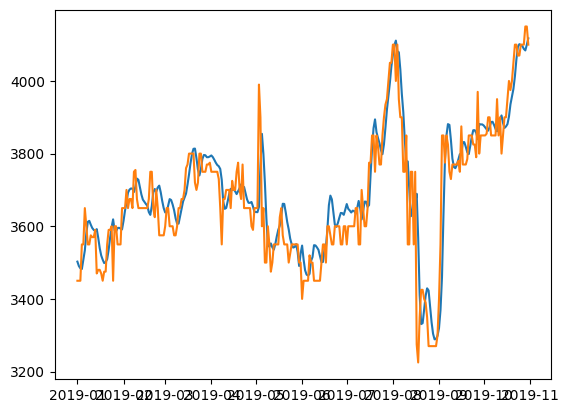

In [19]:
import matplotlib.pyplot as plt
plt.plot(test['Date'][0:304],y_pred_scaled.reshape(-1))
plt.plot(test['Date'][0:304],y_test_scaled.reshape(-1))

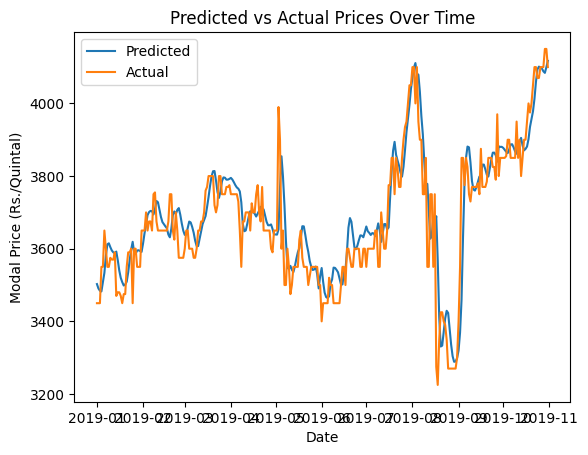

In [20]:

# Define the date range for plotting
date_range = test['Date'].iloc[:len(y_pred_scaled)]

# Plot the predictions against the actual values over time
plt.plot(date_range, y_pred_scaled, label='Predicted')
plt.plot(date_range, y_test_scaled, label='Actual')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time')
plt.legend()

# Show plot
plt.show()

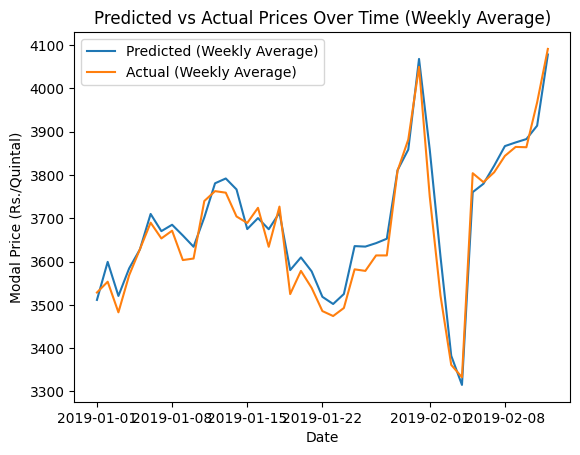

In [21]:
# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)


# Plot the weekly average predictions against the actual values
plt.plot(test['Date'][:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test['Date'][:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()
plt.savefig("static/my_plot1.png")
# Show plot
plt.show()

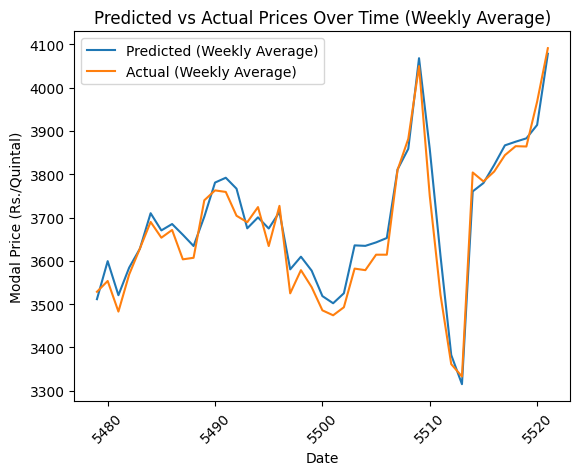

In [22]:

# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)

# Plot the weekly average predictions against the actual values
plt.plot(test.index[:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test.index[:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.savefig('static/my_plot.png')
# Show plot
plt.show()

In [23]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import row, column
from bokeh.models.widgets import TextInput
from bokeh.models import CustomJS

# Define Bokeh plots
plot1 = figure(title="Predicted vs Actual Prices Over Time",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

plot2 = figure(title="Predicted vs Actual Prices Over Time (Weekly Average)",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

# Add data to plots
source1 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_scaled)],
                                     predicted=y_pred_scaled.reshape(-1),
                                     actual=y_test_scaled.reshape(-1)))
plot1.line(x='date', y='predicted', source=source1, legend_label='Predicted', color='blue')
plot1.line(x='date', y='actual', source=source1, legend_label='Actual', color='orange')

source2 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_weekly)],
                                     predicted_weekly=y_pred_weekly,
                                     actual_weekly=y_test_weekly))
plot2.line(x='date', y='predicted_weekly', source=source2, legend_label='Predicted (Weekly Average)', color='blue')
plot2.line(x='date', y='actual_weekly', source=source2, legend_label='Actual (Weekly Average)', color='orange')

# Add hover tooltips
hover_tool1 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted"), ("Actual", "@actual")],
                        formatters={"@date": "datetime"})
plot1.add_tools(hover_tool1)

hover_tool2 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted_weekly"), ("Actual", "@actual_weekly")],
                        formatters={"@date": "datetime"})
plot2.add_tools(hover_tool2)

# Define dashboard layout
dashboard_layout = column(plot1, plot2)

# Save and show the dashboard
output_file("index.html")
show(dashboard_layout)
